In [1]:
from pathlib import Path
import dum_tv.apps.model.main as main
__file__ = main.__file__
cfn = Path(__file__).stem

import dum_tv as pkg
root_pkg = Path(pkg.__file__).parent

configs_fname = ".".join(Path(__file__).relative_to(root_pkg).parts)
configs_fname  = Path(configs_fname).stem+".yaml"

from torch.utils.data import Dataset
class Dataset0(Dataset):
    def __init__(self,dataset):
        self.dataset = dataset
        
    def __getitem__(self,index):
        return self.dataset[index][0]
    def __len__(self):
        return len(self.dataset)

denoise = main.get_dataset_DenoiseToy() 
dm_map = {
    "denoise": main.DenoiseDataModule(denoise["dataset_train"],denoise["dataset_test"],batch_size = 1),
    "denoise-iteration": main.DenoiseDataModule(Dataset0(denoise["dataset_train"]),Dataset0(denoise["dataset_test"]),batch_size = 64),
}



/home/tjrym/miniconda3/envs/pytorch112/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libjpeg.so.8: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


Already generated, use cache: /home/tjrym/workspace/DUM-TV/dum_tv/../Datasets/DenoiseToy/data/train/clean_noisy


[23:44:47] No errmsg.                                                                                 ]8;id=868734;file:///home/tjrym/workspace/Ren-Utils/ren_utils/rennet.py\rennet.py]8;;\:]8;id=177269;file:///home/tjrym/workspace/Ren-Utils/ren_utils/rennet.py#282\282]8;;\

Already generated, use cache: /home/tjrym/workspace/DUM-TV/dum_tv/../Datasets/DenoiseToy/data/test/clean_noisy


           No errmsg.                                                                                 ]8;id=339776;file:///home/tjrym/workspace/Ren-Utils/ren_utils/rennet.py\rennet.py]8;;\:]8;id=48301;file:///home/tjrym/workspace/Ren-Utils/ren_utils/rennet.py#282\282]8;;\

In [2]:
# denoise = main.get_dataset_DenoiseToy()
# dts = denoise["dataset_train"]
# 
# print("dts[0]",type(dts[0]), len(dts[0]))
# print("dts[0][0]",type(dts[0][0]),dts[0][0].shape)
# 
# dm  = main.DenoiseDataModule(denoise["dataset_train"],denoise["dataset_test"],batch_size = 1)
# pack = next(iter(dm.train_dataloader()))
# print("pack",type(pack),len(pack))
# print("pack[0]",type(pack[0]),pack[0].shape)

In [3]:


# ====
from ren_utils.pl import run_by_title
gpuid = 0

dm_name = "denoise-iteration"
dm = dm_map[dm_name]
group = ["Iteration"]


### Basic experiments
def run(title,gpuid,dm_name,dm):
    return run_by_title(title,gpuid,f"{cfn}__{dm_name}",dm,compiler_dict=vars(main),p_configs = main.configs_path)
### Iteration; No train
if "Iteration" in group:
    results = run(f"iteration",gpuid,dm_name,dm)

{'iteration': ('compile_iteration_tv',
               {'n_iteration': 40,
                'patch_shape': [3, 256, 256],
                'varia_d': {'C': 3,
                            'beta': 0.04,
                            'kO': 2,
                            'kR': 1,
                            'kerK': 'DxDy',
                            'rho': 0.8},
                'varia_d-name': 'Toy'})}


/home/tjrym/miniconda3/envs/pytorch112/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:447: LightningDeprecationWarning: Setting `Trainer(gpus=[0])` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=[0])` instead.
  rank_zero_deprecation(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/tjrym/miniconda3/envs/pytorch112/lib/python3.10/site-packages/pytorch_lightning/trainer/configuration_validator.py:267: LightningDeprecationWarning: The `Callback.on_epoch_start` hook was deprecated in v1.6 and will be removed in v1.8. Please use `Callback.on_<train/validation/test>_epoch_start` instead.
  rank_zero_deprecation(
/home/tjrym/miniconda3/envs/pytorch112/lib/python3.10/site-packages/pytorch_lightning/trainer/configuration_validator.py:267: LightningDeprecationWarning: The `Callback.on_epoch_end

- Save yaml: /home/tjrym/workspace/DUM-TV/Results/main__denoise-iteration_iteration/lightning_logs/version_24/config.yaml
- Save yaml: /home/tjrym/workspace/DUM-TV/Results/main__denoise-iteration_iteration/lightning_logs/version_24/note.yaml


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/tjrym/miniconda3/envs/pytorch112/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:236: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 24 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

In [4]:
type(results)
print(len(results))

1


In [5]:
type(results[0])
print(results[0].shape)

torch.Size([6, 3, 256, 256])


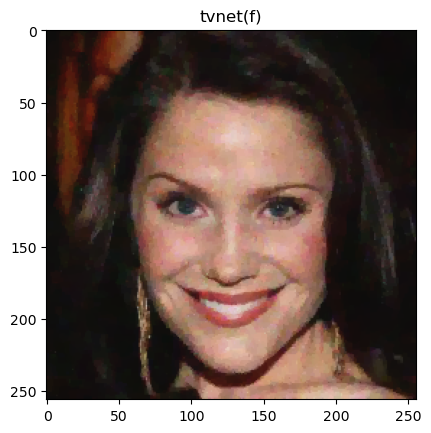

In [6]:
from matplotlib import pyplot as plt
img = results[0][0].permute(1,2,0)
plt.title("tvnet(f)")
plt.imshow(img)
plt.show()

In [7]:

dm = main.DenoiseDataModule(denoise["dataset_train"],denoise["dataset_test"],batch_size = 1)

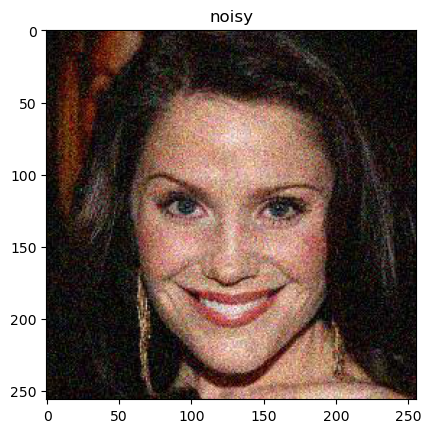

In [8]:
noisy_img = next(iter(dm.test_dataloader())) # BCHW
noisy_img = noisy_img[0][0].permute(1,2,0)
plt.title("noisy")
plt.imshow(noisy_img)
plt.show()

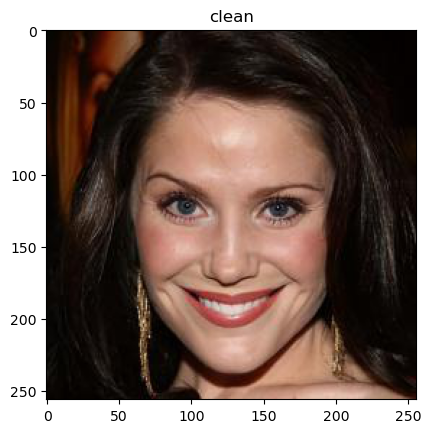

In [9]:
clean_img = next(iter(dm.test_dataloader()))
clean_img = clean_img[1][0].permute(1,2,0)
plt.title("clean")
plt.imshow(clean_img)
plt.show()

## Training

In [12]:


# ====
from ren_utils.pl import run_by_title
gpuid = 0

dm_name = "denoise"
dm = dm_map[dm_name]
group = ["Training"]


### Basic experiments
def run(title,gpuid,dm_name,dm):
    return run_by_title(title,gpuid,f"{cfn}__{dm_name}",dm,compiler_dict=vars(main),p_configs = main.configs_path)
### Iteration; No train
if "Training" in group:
    results = run(f"training",gpuid,dm_name,dm)

{'training': ('compile_training_tv',
              {'lr': 2e-05,
               'lr_scheduler_frequency': 2000,
               'max_epochs': 20,
               'n_iteration': 128,
               'patch_shape': [3, 256, 256],
               'varia_d': {'C': 3,
                           'beta': 0.04,
                           'kO': 4,
                           'kR': 5,
                           'kerK': 'DxDy',
                           'rho': 0.8},
               'varia_d-name': 'Toy'})}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


- Save yaml: /home/tjrym/workspace/DUM-TV/Results/main__denoise_training/lightning_logs/version_2/config.yaml
- Save yaml: /home/tjrym/workspace/DUM-TV/Results/main__denoise_training/lightning_logs/version_2/note.yaml


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type  | Params
--------------------------------
0 | tvnet | TVNet | 188 K 
--------------------------------
188 K     Trainable params
0         Non-trainable params
188 K     Total params
0.756     Total estimated model params size (MB)


- Save model summary: /home/tjrym/workspace/DUM-TV/Results/main__denoise_training/lightning_logs/version_2/model_summary.txt


Sanity Checking: 0it [00:00, ?it/s]

- elapsed time:  0:00:01.797988 



Training: 0it [00:00, ?it/s]